In [2]:
import cv2
img = cv2.imread('deno_img.jpg')
cv2.imshow('image', img)
# user presses a key 
cv2.waitKey(0)         
  
# Destroying present windows on screen 
cv2.destroyAllWindows() 

In [3]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('deno_img.jpg') 
img=img/255


In [4]:
import numpy as np
import os
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
      # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

      # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)    
        noisy = image + image * gauss
        return noisy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: 

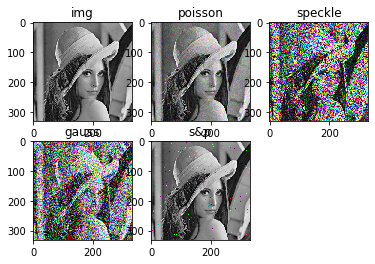

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax1.title.set_text('img')
ax2.title.set_text('poisson')
ax3.title.set_text('speckle')
ax4.title.set_text('gauss')
ax5.title.set_text("s&p")
fig.add_subplot(2,3,1)
plt.imshow(img)
fig.add_subplot(2,3,2)
plt.imshow(noisy("poisson",img))
fig.add_subplot(2,3,3)
plt.imshow(noisy("speckle",img))
fig.add_subplot(2,3,4)
plt.imshow(noisy("gauss",img))
fig.add_subplot(2,3,5)
plt.imshow(noisy("s&p",img))


In [6]:
#psnr image and mse
from math import log10, sqrt 
import cv2 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 1.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr ,mse
  
def main(img,comp_img,st): 
    original = img
    compressed =  noisy("poisson",img)
    value,mse = PSNR(original, comp_img) 
    print(st,f"PSNR value is {value} dB") 
    print(st,f"MSE value is {mse}") 
       
if __name__ == "__main__": 
    main(img,noisy("poisson",img),"poisson") 
    main(img,noisy("speckle",img),"speckle")
    main(img,noisy("gauss",img),"gauss")
    main(img,noisy("s&p",img),"s&p") 

poisson PSNR value is 27.564154892816607 dB
poisson MSE value is 0.0017522033677564663
speckle PSNR value is 6.0010699927432265 dB
speckle MSE value is 0.2511267641886017
gauss PSNR value is 10.012408266612011 dB
gauss MSE value is 0.09971469686784146
s&p PSNR value is 29.081047641183943 dB
s&p MSE value is 0.0012356493239072677


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [7]:
x=np.array([[1,2,1],[2,4,2],[1,2,1]])/18

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def filtering(img,noise,fil):
    img_1 = noisy(noise,img)
    if fil=="gaussian":
        x=np.array([[1,2,1],[2,4,2],[1,2,1]])/18
        kernel = x
    elif fil=="linear":
        kernel= np.ones((3,3),np.float32)/9
    filimg = cv2.filter2D(img_1,-1,kernel)
    psnr,mse=PSNR(img,filimg)
    print("psnr ={} dB \t mse={} after adding {} the noise".format(psnr,mse,noise))
    psnr,mse=PSNR(img,img_1)
    print("psnr ={} dB \t mse={} after applying {} filter".format(psnr,mse,fil))
    
    plt.subplot(131),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img_1),plt.title('with {} noise'.format(noise))
    plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(filimg),plt.title('after applying {} filter'.format(fil))
    plt.xticks([]), plt.yticks([])
    plt.show()
      
      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


psnr =19.064586376701744 dB 	 mse=0.012403417499942854 after adding gauss the noise
psnr =9.991931230670133 dB 	 mse=0.10018596297685282 after applying linear filter


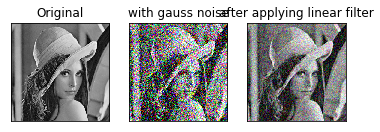

psnr =28.53887315811758 dB 	 mse=0.0013999505135178039 after adding s&p the noise
psnr =29.113177712014988 dB 	 mse=0.00122654144821775 after applying linear filter


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


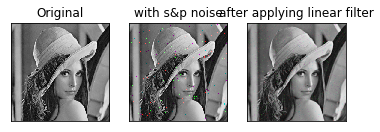

psnr =28.382748343935038 dB 	 mse=0.0014511929691108888 after adding poisson the noise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


psnr =27.56749362885127 dB 	 mse=0.0017508568398522367 after applying linear filter


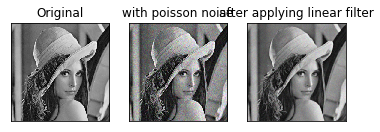

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


psnr =15.337389948817997 dB 	 mse=0.029259102821153328 after adding speckle the noise
psnr =6.026639478071577 dB 	 mse=0.249652576333842 after applying linear filter


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


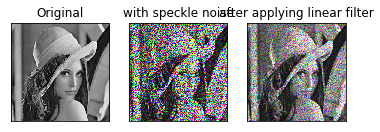

In [9]:
filtering(img,"gauss","linear")
filtering(img,"s&p","linear")
filtering(img,"poisson","linear")
filtering(img,"speckle","linear")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


psnr =18.17088159825653 dB 	 mse=0.01523743409344804 after adding gauss the noise
psnr =9.998522118350433 dB 	 mse=0.10003403527324027 after applying gaussian filter


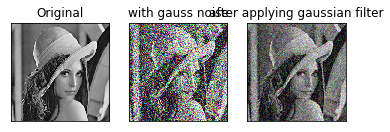

psnr =23.760018378968834 dB 	 mse=0.004207248479093169 after adding s&p the noise
psnr =29.185790970021838 dB 	 mse=0.0012062043851072239 after applying gaussian filter


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


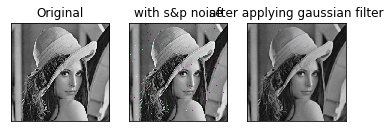

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


psnr =23.7415568256503 dB 	 mse=0.004225171264064332 after adding poisson the noise
psnr =27.56884050367086 dB 	 mse=0.0017503139318819267 after applying gaussian filter


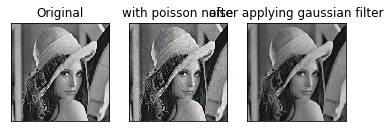

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


psnr =14.994462701890093 dB 	 mse=0.031663121673061546 after adding speckle the noise
psnr =6.035590765296361 dB 	 mse=0.2491385448188166 after applying gaussian filter


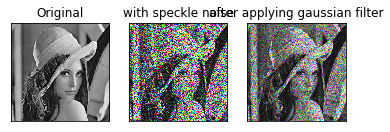

In [10]:
filtering(img,"gauss","gaussian")
filtering(img,"s&p","gaussian")
filtering(img,"poisson","gaussian")
filtering(img,"speckle","gaussian")

In [21]:
#median Blur filter
img=np.float32(img)
final = cv2.medianBlur(img, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


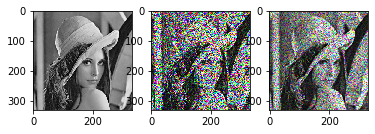

In [32]:

fig=plt.figure()
fig.add_subplot(1,3,1)
plt.imshow(img)
fig.add_subplot(1,3,2)
plt.imshow(noisy("speckle",img))
fig.add_subplot(1,3,3)
plt.imshow(cv2.medianBlur(np.float32(noisy("speckle", img)),3))
        